## Draft. This jupyter notebook was used to review data files and try to learn insights from the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data_folder = '../../../idao_2021_train/'
df_appl = pd.read_csv(data_folder + 'appl.csv')
df_aum = pd.read_csv(data_folder + 'aum.csv')
df_balance = pd.read_csv(data_folder + 'balance.csv')
df_client = pd.read_csv(data_folder + 'client.csv')
df_com = pd.read_csv(data_folder + 'com.csv')
df_funnel = pd.read_csv(data_folder + 'funnel.csv')
df_payments = pd.read_csv(data_folder + 'payments.csv')
df_deals = pd.read_csv(data_folder + 'deals.csv')
df_trxn = pd.read_csv(data_folder + 'trxn.csv')

/Users/andreizn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# initial cleaning

In [14]:
df_client["education_bool"] = (df_client["education"] == 'PRIMARY_PROFESSIONAL') | (pd.isna(df_client["education"]))
df_client["education_bool"] = 1 - (df_client["education_bool"]).astype('int64')
cid_idx = df_client[df_client["education_bool"] == 1].client_id

df_appl = df_appl.loc[df_appl['client_id'].isin(cid_idx.values)]
df_aum = df_aum.loc[df_aum['client_id'].isin(cid_idx.values)]
df_balance = df_balance.loc[df_balance['client_id'].isin(cid_idx.values)]
df_client = df_client.loc[df_client['client_id'].isin(cid_idx.values)]
df_com = df_com.loc[df_com['client_id'].isin(cid_idx.values)]
# df_funnel = df_funnel.loc[df_funnel['client_id'].isin(cid_idx.values)]
df_payments = df_payments.loc[df_payments['client_id'].isin(cid_idx.values)]
df_deals = df_deals.loc[df_deals['client_id'].isin(cid_idx.values)]
df_trxn = df_trxn.loc[df_trxn['client_id'].isin(cid_idx.values)]

In [4]:
contacts = df_funnel.contacts.values
y = df_funnel.sale_flg.values

In [5]:
sum(y)/len(y)

0.3880778588807786

# appl.csv

In [83]:
df_appl.head()

,client_id,month_end_dt,appl_prod_group_name,appl_prod_type_name,appl_stts_name_dc,appl_sale_channel_name
2,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
3,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
4,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
6,-4044521687787721089,2018-11-30,PILS,PILS,The consultation is over,Network
7,1657859473600065768,2018-10-31,PILS,PILS,The consultation is over,Network


In [103]:
df_appl['appl_prod_type_name'].value_counts()

Credit cards    3549
Debit cards     3525
PILS            3320
Mortgage          20
Name: appl_prod_type_name, dtype: int64

In [106]:
df_appl_grouped_mean

,client_id,appl_prod_type_name_bool
0,1316154201527307743,1.0
1,-4044521687787721089,1.0
2,1657859473600065768,1.0
3,-2226802752242197751,1.0
4,-9079895224318432575,1.0
...,...,...
4843,-2659496364726359571,1.0
4844,-4062484147246531541,1.0
4845,-1823293089681696442,0.0
4846,4109280571813979726,0.0


In [122]:
df_appl["appl_prod_type_name_bool"] = (df_appl["appl_prod_type_name"] != 'Credit cards').astype('int64')
df_appl_grouped = df_appl.groupby(by="client_id", as_index=False, sort=False)["appl_prod_type_name_bool"]
df_appl_grouped_mean = df_appl_grouped.mean()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_appl_grouped_mean["appl_prod_type_name_bool"].values

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_appl_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_appl_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [123]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00750369],
       [-0.00750369,  1.        ]])

In [124]:
df_appl['appl_stts_name_dc'].value_counts()

Issuance has been made                     4096
Issuing a card                             1248
Informing the Methodics                     805
The consultation is over                    501
Attachment of documents (after release)     423
Draft                                       108
Client refusal (Methodics)                   84
The documents have been prepared             34
Bank refusal (sent to Methodics)             21
Client refusal                               16
Formation of the application                 16
An agreement is required to be signed        16
Attachment of documents                       6
Verification of customer data                 5
four                                          3
Getting a list of customer cards              3
To issue                                      2
Confirmation of issue by the Controller       2
Improvement is required from the URC          1
Waiting for contract data                     1
Name: appl_stts_name_dc, dtype: int64

In [212]:
df_appl["Issuance_bool"] = (df_appl["appl_stts_name_dc"] == '') | (df_appl["appl_stts_name_dc"] == 'Draft') | (df_appl["appl_stts_name_dc"] == 'The documents have been prepared') | (df_appl["appl_stts_name_dc"] == 'The documents have been prepared')

In [283]:
df_appl["Issuance_bool"] = (df_appl["appl_stts_name_dc"] == 'Client refusal')
df_appl_grouped = df_appl.groupby(by="client_id", as_index=False, sort=False)["Issuance_bool"]
df_appl_grouped_mean = df_appl_grouped.mean().round()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_appl_grouped_mean["Issuance_bool"].values

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_appl_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_appl_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [284]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[1.        , 0.01937561],
       [0.01937561, 1.        ]])

In [285]:
df_a_selected = df_appl_grouped_mean.loc[df_appl_grouped_mean["Issuance_bool"] != 0]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_a_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [286]:
sum(df_funnel_selected_shuffled.sale_flg) / len(df_funnel_selected_shuffled.sale_flg)

0.25

In [254]:
df_a_selected

,client_id,Issuance_bool
2866,5514924409041426526,1.0
2870,-4667182362076220452,1.0
4828,-5987867101718833502,1.0
4829,2893773721942246831,1.0


# aum.csv

In [6]:
df_aum.head()

,client_id,month_end_dt,balance_rur_amt,product_code
20,-2918739578801888500,2019-01-31,115.0,Current accounts
21,-2918739578801888500,2019-03-31,1083.0,Current accounts
22,-2918739578801888500,2019-05-31,58469.0,Current accounts
23,-2918739578801888500,2019-07-31,105085.0,Current accounts
24,-2918739578801888500,2019-08-31,10827.0,Current accounts


In [7]:
df_aum['product_code'].value_counts()

Current accounts    60181
Time account         1880
NSJ                   631
UK                    570
Broker                390
ILI                   186
Name: product_code, dtype: int64

In [8]:
df_aum["current_accounts_bool"] = (df_aum["product_code"] == 'Current accounts').astype('int64')
df_aum_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["current_accounts_bool"]
df_aum_grouped_max = df_aum_grouped.mean()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_aum_grouped_max["current_accounts_bool"].values

In [9]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_aum_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_aum_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [10]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

In [17]:
sum(df_funnel_selected.sale_flg)/len(df_funnel_selected.sale_flg)

0.43724058966652357

In [18]:
df_aum_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["balance_rur_amt"]
df_aum_grouped_max = df_aum_grouped.max()
df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_aum_grouped_max["balance_rur_amt"].values

In [19]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_aum_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_aum_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [20]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00456379],
       [-0.00456379,  1.        ]])

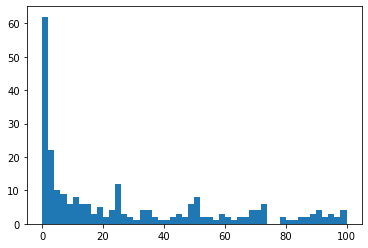

In [21]:
plt.hist(df_aum_grouped_max.balance_rur_amt, bins=50, range=(0,100))
plt.show()

In [22]:
df_a_selected = df_aum_grouped_max.loc[df_aum_grouped_max["balance_rur_amt"] == 0]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_a_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [23]:
df_funnel_selected_shuffled

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
0,-4882956838023690136,0,NaN,3,7,7.0,1664899.0,45785.0,6175.0,0.0,81725.0,1664563.0,1377044.0,9.4,35696.0,77.0
1,4485763970052208069,0,NaN,1,2,9.0,0.0,0.0,24776.0,0.0,46041.0,922733.0,505606.0,7.4,18446.0,66.0
2,3028904512556417089,0,NaN,2,7,7.0,611580.0,13329.0,3567.0,0.0,11925.0,611918.0,505717.0,9.9,13338.0,64.0
3,3112717114058191714,0,NaN,1,1,5.0,3642369.0,12643.0,15128.0,0.0,38761.0,582779.0,481635.0,10.9,12642.0,42.0
4,6348658568834479759,0,NaN,1,6,13.0,2428246.0,101429.0,106113.0,0.0,229034.0,2428246.0,2209505.0,14.9,57640.0,77.0
5,-2731423505468305301,1,27139.25,2,1,13.0,3642369.0,21786.0,13821.0,0.0,71874.0,981011.0,831366.0,11.9,21773.0,33.0
6,-8436172258658674772,0,NaN,1,9,13.0,285361.0,6883.0,0.0,0.0,0.0,259822.0,201725.0,19.9,6869.0,23.0
7,6854611043171023972,0,NaN,1,6,4.0,2428246.0,112737.0,78352.0,0.0,130442.0,2428246.0,1095631.0,14.4,57006.0,86.0
8,2185797961583148087,0,NaN,1,5,8.0,3533098.0,23979.0,46194.0,0.0,86387.0,1131563.0,991728.0,9.9,23987.0,12.0
9,-3289550876719723057,0,NaN,1,6,13.0,2428246.0,34162.0,21309.0,0.0,53537.0,1438736.0,1260943.0,14.9,34152.0,39.0


In [24]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.1724137931034483

In [25]:
len(df_funnel_selected_shuffled.sale_flg.values)

29

# balance.csv

In [26]:
df_balance.head()

,client_id,crncy_cd,eop_bal_sum_rur,min_bal_sum_rur,max_bal_sum_rur,avg_bal_sum_rur,month_end_dt,prod_cat_name,prod_group_name
168,-2918739578801888500,810.0,0.0,58.0,58.0,58.0,2019-01-31,CURRENT ACCOUNTS,Cash on demand
169,-2918739578801888500,810.0,58.0,58.0,58.0,58.0,2019-02-28,CURRENT ACCOUNTS,Cash on demand
170,-2918739578801888500,810.0,0.0,58.0,58.0,58.0,2019-03-31,CURRENT ACCOUNTS,Cash on demand
171,-2918739578801888500,810.0,0.0,58.0,58.0,58.0,2019-04-30,CURRENT ACCOUNTS,Cash on demand
172,-2918739578801888500,810.0,58.0,58.0,58.0,58.0,2019-05-31,CURRENT ACCOUNTS,Cash on demand


### prod_cat_name

In [27]:
df_balance['prod_cat_name'].value_counts(dropna=False)

KN                        369308
CURRENT ACCOUNTS          161178
DEPOSITS                   70599
SALARY CARDS               38499
DEBIT CARDS                23191
CREDIT CARDS               15220
MORTGAGE                    4157
TECHNICAL CARDS             1967
NaN                          786
CAR LOANS                    612
CREDITS IN CASH OR           264
CASH CREDITS (X-SALE)        180
Cash on demand               132
OTHER MORTGAGE                36
URGENT DEPOSITS BIN           24
VIP CREDIT CARDS              12
LENDING SALARY CLIENTS        12
LOANS FOR EMPLOYEES           12
PREAD MAP                     12
Name: prod_cat_name, dtype: int64

In [52]:
df_balance["KN_bool"] = (df_balance["prod_cat_name"] == 'KN ').astype('int64')
df_balance_grouped = df_balance.groupby(by="client_id", as_index=False, sort=False)["KN_bool"]
df_balance_grouped_mean = df_balance_grouped.mean()
df_balance_grouped_mean = df_balance_grouped_mean.fillna(0)
feat = df_balance_grouped_mean["KN_bool"].values

In [53]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_balance_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_balance_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [54]:
y_selected = df_funnel_selected['sale_flg'].values

In [55]:
np.corrcoef(y_selected, feat)

array([[ 1., nan],
       [nan, nan]])

In [56]:
sum(y_selected) / len(y_selected)

0.4013189448441247

### max_bal_sum_rur

In [57]:
df_balance_grouped = df_balance.groupby(by="client_id", as_index=False, sort=False)["max_bal_sum_rur"]
df_balance_grouped_mean = df_balance_grouped.mean()
df_balance_grouped_mean = df_balance_grouped_mean.fillna(0)
feat = df_balance_grouped_mean["max_bal_sum_rur"].values

In [58]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_balance_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_balance_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

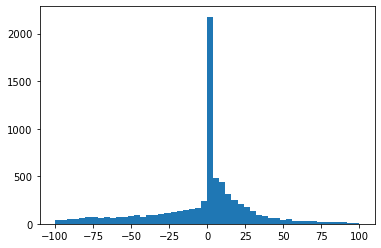

In [59]:
plt.hist(df_balance_grouped_mean.max_bal_sum_rur, bins=50, range=(-100,100))
plt.show()

In [60]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00441135],
       [-0.00441135,  1.        ]])

In [61]:
df_balance_grouped_mean.head(20)

,client_id,max_bal_sum_rur
0,-2918739578801888500,-821.791667
1,-4569470415387261653,0.000000
2,497866795935220651,-60.880000
3,-3506296450266498598,44.040000
4,377141127543547866,5.989583
5,-5924052245502407994,-29.185185
6,-6290602817115676905,-23.785124
7,-1490294173029062751,0.000000
8,2897849887287086776,26.035144
9,-4976026508164850392,-36.055556


In [62]:
df_b_selected = df_balance_grouped_mean.loc[df_balance_grouped_mean["max_bal_sum_rur"] == 0]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_b_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [63]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.21714687280393535

In [64]:
len(df_funnel_selected_shuffled.sale_flg.values)

1423

In [65]:
df_funnel_selected_shuffled

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
0,-4569470415387261653,0,NaN,2,1,8.0,1000940.0,15992.0,11534.0,0.0,83000.0,736973.0,624553.0,10.9,15987.0,56.0
1,-1490294173029062751,0,NaN,1,9,13.0,1821184.0,20318.0,18175.0,0.0,49740.0,547569.0,486296.0,19.9,20322.0,60.0
2,-8924943255777980502,0,NaN,1,7,14.0,277082.0,1713.0,0.0,0.0,0.0,78918.0,61272.0,10.9,1712.0,86.0
3,5357850912465967720,1,182118.45,2,2,4.0,3642369.0,249648.0,102362.0,0.0,388983.0,3642369.0,3314257.0,7.9,79012.0,47.0
4,-6701142133563872894,0,NaN,1,8,12.0,2428246.0,10193.0,8438.0,0.0,25082.0,420087.0,332128.0,15.9,10193.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,5445260659657012350,0,NaN,1,2,14.0,3642369.0,36424.0,42257.0,0.0,88092.0,1759264.0,1541862.0,8.9,36434.0,77.0
1419,-4437111923561786192,0,NaN,1,9,14.0,1821184.0,26669.0,23885.0,0.0,47958.0,1008936.0,855030.0,19.9,26675.0,64.0
1420,3012385405779319223,0,NaN,1,8,4.0,785377.0,20943.0,0.0,0.0,7039.0,785538.0,665710.0,17.9,19905.0,78.0
1421,2675264984639167644,0,NaN,1,5,5.0,3642369.0,158634.0,123990.0,0.0,339998.0,3642369.0,2128202.0,9.4,76319.0,78.0


In [51]:
df_funnel_selected_shuffled = df_funnel_selected_shuffled.fillna(0)
df_funnel_selected_shuffled["nic"] = df_funnel_selected_shuffled["sale_flg"] * df_funnel_selected_shuffled["sale_amount"] - df_funnel_selected_shuffled["contacts"] * 4000

In [52]:
df_funnel_selected_shuffled = df_funnel_selected_shuffled.fillna(0)
df_funnel_selected_shuffled["nic"] = 1 * df_funnel_selected_shuffled["sale_amount"] - df_funnel_selected_shuffled["contacts"] * 4000
print(sum(df_funnel_selected_shuffled.query("sale_flg == 1").nic.values))

11925598.550000003


In [53]:
df_funnel_selected_shuffled = df_funnel_selected_shuffled.fillna(0)
df_funnel_selected_shuffled["nic"] = 1 * df_funnel_selected_shuffled["sale_amount"] - df_funnel_selected_shuffled["contacts"] * 4000
print(sum(df_funnel_selected_shuffled.nic.values))

6509598.549999999


In [54]:
df_funnel_selected_shuffled

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd,nic
0,-4569470415387261653,0,0.00,2,1,8.0,1000940.0,15992.0,11534.0,0.0,83000.0,736973.0,624553.0,10.9,15987.0,56.0,-8000.00
1,-1490294173029062751,0,0.00,1,9,13.0,1821184.0,20318.0,18175.0,0.0,49740.0,547569.0,486296.0,19.9,20322.0,60.0,-4000.00
2,-8924943255777980502,0,0.00,1,7,14.0,277082.0,1713.0,0.0,0.0,0.0,78918.0,61272.0,10.9,1712.0,86.0,-4000.00
3,5357850912465967720,1,182118.45,2,2,4.0,3642369.0,249648.0,102362.0,0.0,388983.0,3642369.0,3314257.0,7.9,79012.0,47.0,174118.45
4,-6701142133563872894,0,0.00,1,8,12.0,2428246.0,10193.0,8438.0,0.0,25082.0,420087.0,332128.0,15.9,10193.0,50.0,-4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,5445260659657012350,0,0.00,1,2,14.0,3642369.0,36424.0,42257.0,0.0,88092.0,1759264.0,1541862.0,8.9,36434.0,77.0,-4000.00
1419,-4437111923561786192,0,0.00,1,9,14.0,1821184.0,26669.0,23885.0,0.0,47958.0,1008936.0,855030.0,19.9,26675.0,64.0,-4000.00
1420,3012385405779319223,0,0.00,1,8,4.0,785377.0,20943.0,0.0,0.0,7039.0,785538.0,665710.0,17.9,19905.0,78.0,-4000.00
1421,2675264984639167644,0,0.00,1,5,5.0,3642369.0,158634.0,123990.0,0.0,339998.0,3642369.0,2128202.0,9.4,76319.0,78.0,-4000.00


### crncy_cd

In [55]:
df_balance['crncy_cd'].value_counts(dropna=False)

810.0    666241
840.0     11882
978.0      7005
500.0       360
826.0       295
NaN         288
98.0         33
33.0         24
99.0         20
76.0         17
756.0        12
392.0        12
156.0        12
Name: crncy_cd, dtype: int64

In [56]:
df_balance_grouped = df_balance.groupby(by="client_id", as_index=False, sort=False)["crncy_cd"]
df_balance_grouped_mean = df_balance_grouped.mean()
df_balance_grouped_mean = df_balance_grouped_mean.fillna(0)
feat = df_balance_grouped_mean["crncy_cd"].values

In [57]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_balance_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_balance_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [58]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.00000000e+00, -5.60724504e-04],
       [-5.60724504e-04,  1.00000000e+00]])

In [59]:
df_balance_grouped_mean['crncy_cd'].value_counts(dropna=False)

810.000000    7787
825.000000      12
816.000000      11
834.000000       7
831.000000       6
              ... 
816.858974       1
815.776561       1
861.368421       1
811.250000       1
810.927835       1
Name: crncy_cd, Length: 427, dtype: int64

In [60]:
df_b_selected = df_balance_grouped_mean.loc[df_balance_grouped_mean["crncy_cd"] != 810]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_b_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [61]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.28390596745027125

# client.csv

In [66]:
df_client.head()

,client_id,gender,age,region,city,citizenship,education,job_type,education_bool
4,-8156468515495593794,F,34.0,-1,-1,RUSSIA,HIGHER_PROFESSIONAL,NaN,1
5,-2918739578801888500,M,34.0,7,13,RUSSIA,HIGHER_PROFESSIONAL,NaN,1
6,-4569470415387261653,M,55.0,19,27,RUSSIA,HIGHER_PROFESSIONAL,NaN,1
7,497866795935220651,F,48.0,28,45,RUSSIA,HIGHER_PROFESSIONAL,NaN,1
10,-1093433514453846397,F,39.0,20,104,RUSSIA,MIDDLE_PROFESSIONAL,NaN,1


In [67]:
df_client['region'].value_counts(dropna=False)[:10]

0     1650
1      479
7      452
3      359
25     340
8      333
37     314
17     263
21     242
9      218
Name: region, dtype: int64

### education and job type

In [68]:
df_client['education'].value_counts(dropna=False)

HIGHER_PROFESSIONAL            4463
MIDDLE_PROFESSIONAL            3550
FULL_GENERAL                    606
HIGHER_PROFESSIONAL_PARTIAL     258
TWO_AND_MORE_HIGHER             147
SCHOLASTIC_DEGREE                18
Name: education, dtype: int64

In [69]:
df_client['job_type'].value_counts(dropna=False)

NaN                8991
RETIRED              22
BUSINESS             15
STUDENT              10
MATERNITY_LEAVE       4
Name: job_type, dtype: int64

In [70]:
df_client["job_type_bool"] = 1 - pd.isna(df_client["job_type"]).astype('int64')
# df_client["education_bool"] = (df_client["education"] == 'HIGHER_PROFESSIONAL').astype('int64')
feat = df_client["job_type_bool"].values
np.corrcoef(y, feat)

array([[ 1.       , -0.0266434],
       [-0.0266434,  1.       ]])

In [128]:
df_client["education_bool"] = 1 - pd.isna(df_client["education"]).astype('int64')
# df_client["education_bool"] = (df_client["education"] == 'HIGHER_PROFESSIONAL').astype('int64')
feat = df_client["education_bool"].values
np.corrcoef(y, feat)

array([[ 1., nan],
       [nan, nan]])

In [80]:
df_client_HP_edu = df_client.loc[df_client["education"] == 'MIDDLE_PROFESSIONAL']

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_HP_edu.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_HP_edu['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [81]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.32253521126760565

In [1019]:
df_client_NaN_edu = df_client.loc[pd.isna(df_client["education"])]

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_NaN_edu.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_NaN_edu['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [1020]:
df_client_NaN_edu

,client_id,gender,age,region,city,citizenship,education,job_type,education_bool
0,7513301859607023584,F,33.0,0,115,RUSSIA,NaN,NaN,0
1,9157009756404187626,F,59.0,17,668,RUSSIA,NaN,NaN,0
2,-1893104556496814867,M,51.0,28,65,RUSSIA,NaN,NaN,0
3,6886062013213911831,F,56.0,0,40,RUSSIA,NaN,NaN,0
8,-2652197677327635516,M,46.0,30,46,RUSSIA,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
21490,2261406502954952560,M,35.0,6,3740,RUSSIA,NaN,NaN,0
21493,4662551505651924284,M,31.0,0,14,RUSSIA,NaN,NaN,0
21494,-8968737688687691353,M,53.0,25,33,RUSSIA,NaN,NaN,0
21495,-5799097497074119478,F,57.0,12,225,RUSSIA,NaN,NaN,0


In [1024]:
len(df_funnel_selected_shuffled.sale_flg)

12218

In [1074]:
# df_client["education_bool"] = 1 - pd.isna(df_client["education"]).astype('int64')
# df_client["education_bool"] = (df_client["education"] == 'SCHOLASTIC_DEGREE').astype('int64')
df_client["education_bool"] = (df_client["education"] == 'PRIMARY_PROFESSIONAL') | (pd.isna(df_client["education"]))
df_client["education_bool"] = 1 - df_client["education_bool"]
feat = df_client["education_bool"].values
np.corrcoef(y, feat)

array([[1.        , 0.51671212],
       [0.51671212, 1.        ]])

### region and city

In [64]:
feat = df_client["region"].values
np.corrcoef(y, feat)

array([[ 1.        , -0.08492985],
       [-0.08492985,  1.        ]])

In [65]:
feat = df_client["city"].values
np.corrcoef(y, feat)

array([[ 1.     , -0.14883],
       [-0.14883,  1.     ]])

In [68]:
for reg in np.unique(df_client.region.values):
    df_client_selected_reg = df_client.query("region == " + str(reg))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_reg.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r > 0.5 and len(df_funnel_selected) > 10:
        print('region: ', reg)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')

region:  -1
0.54
num:  35
 
region:  0
0.52
num:  1650
 
region:  10
0.54
num:  157
 
region:  20
0.51
num:  162
 
region:  66
0.55
num:  11
 


In [71]:
for reg in np.unique(df_client.region.values):
    df_client_selected_reg = df_client.query("region == " + str(reg))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_reg.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r < 0.25 and len(df_funnel_selected) > 5:
        print('region: ', reg)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')

region:  3
0.24
num:  359
 
region:  13
0.23
num:  57
 
region:  64
0.16
num:  73
 


In [72]:
df_client["region_good_bool"] = (df_client["region"] == 0) | (df_client["region"] == 4) | (df_client["region"] == 10) | (df_client["region"] == 50) | (df_client["region"] == 71)

In [73]:
sum(df_client["region_good_bool"].values)

1884

In [74]:
df_client["region_bad_bool"] = (df_client["region"] == 46) | (df_client["region"] == 57) | (df_client["region"] == 60) | (df_client["region"] == 72) | (df_client["region"] == 76)

In [75]:
sum(df_client["region_bad_bool"].values)

123

In [76]:
# df_client_selected = df_client.query("region_bool == 1")
# df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected.client_id.values)]
# sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected)

In [77]:
# df_client["job_type_bool"] = pd.isna(df_client["job_type"]).astype('int64')
# feat = df_client["job_type_bool"].values
# np.corrcoef(y, feat)

In [78]:
# df_client_retired = df_client.loc[df_client['job_type'] == 'MATERNITY_LEAVE']

# df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_retired.client_id.values)]
# df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
# df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_retired['client_id'])
# df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [79]:
df_client_selected_cit = df_client.query("city == " + str(reg))

In [83]:
good_cities = []
for cit in np.unique(df_client.city.values):
    df_client_selected_cit = df_client.query("city == " + str(cit))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_cit.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r > 0.65 and len(df_funnel_selected) > 10:
        print('city: ', cit)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')
        
        good_cities.append(cit)

city:  8
0.65
num:  52
 
city:  66
0.65
num:  23
 
city:  136
0.67
num:  24
 
city:  140
0.67
num:  54
 


In [395]:
df_client["city_good_bool"] = (df_client["city"] == 'dummy_val')

for i, cit in enumerate(good_cities):
    df_client["city_good_bool"] = df_client["city_good_bool"] | (df_client["city"] == cit)

In [484]:
bad_cities = []
for cit in np.unique(df_client.city.values):
    df_client_selected_cit = df_client.query("city == " + str(cit))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_cit.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r < 0.05 and len(df_funnel_selected) > 20:
        print('city: ', cit)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')
        
        bad_cities.append(cit)

city:  70
0.0
num:  22
 
city:  122
0.04
num:  121
 
city:  228
0.03
num:  39
 
city:  308
0.04
num:  25
 
city:  363
0.04
num:  23
 
city:  481
0.04
num:  27
 
city:  508
0.04
num:  24
 
city:  543
0.0
num:  28
 
city:  801
0.0
num:  21
 
city:  1173
0.04
num:  23
 


In [485]:
df_client["city_bad_bool"] = (df_client["city"] == 'dummy_val')

for i, cit in enumerate(bad_cities):
    df_client["city_bad_bool"] = df_client["city_bad_bool"] | (df_client["city"] == cit)

### age and gender

In [85]:
feat = df_client["age"].fillna(0).values
np.corrcoef(y, feat)

array([[ 1.        , -0.05480117],
       [-0.05480117,  1.        ]])

In [86]:
df_client["age_bool"] = df_client["age"] < 55

In [87]:
np.corrcoef(y, df_client["age_bool"].values)

array([[1.        , 0.04262308],
       [0.04262308, 1.        ]])

In [88]:
df_client["gender_bool"] = df_client["gender"] == 'M'

In [89]:
np.corrcoef(y, df_client["gender_bool"].values)

array([[1.        , 0.01493843],
       [0.01493843, 1.        ]])

# funnel.csv

In [114]:
df_funnel.head(20)

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
4,-8156468515495593794,1,138018.05,1,7,14.0,3642369.0,97156.0,81488.0,0.0,160308.0,3642369.0,3314257.0,10.4,78108.0,27.0
5,-2918739578801888500,1,121907.95,1,7,1.0,4212398.0,151894.0,73012.0,161463.0,265647.0,3520957.0,567525.0,7.4,70386.0,77.0
6,-4569470415387261653,0,NaN,2,1,8.0,1000940.0,15992.0,11534.0,0.0,83000.0,736973.0,624553.0,10.9,15987.0,56.0
7,497866795935220651,0,NaN,1,13,3.0,6070615.0,1927.0,30014.0,33300.0,19302.0,94702.0,72847.0,7.9,1936.0,52.0
10,-1093433514453846397,0,NaN,1,9,9.0,1821184.0,5425.0,3715.0,0.0,16073.0,205187.0,157836.0,19.9,5425.0,42.0
12,-330127410754871235,1,121277.55,3,6,8.0,2428246.0,213352.0,97565.0,0.0,296471.0,2428246.0,577495.0,14.4,57006.0,58.0
13,2247869018080705329,0,NaN,1,7,14.0,0.0,0.0,20957.0,0.0,38135.0,825604.0,699664.0,11.9,18323.0,59.0
14,-8220943058821961411,0,NaN,2,2,3.0,6070615.0,21229.0,0.0,12061.0,82175.0,1049002.0,860182.0,7.9,21220.0,16.0
15,-8339249258774556753,1,34481.10,1,1,14.0,0.0,0.0,22923.0,0.0,46179.0,679909.0,561908.0,11.4,14919.0,10.0
19,3487861705076325187,0,NaN,1,4,9.0,3642369.0,29437.0,0.0,0.0,0.0,1455733.0,1275841.0,7.9,29447.0,77.0


In [115]:
df_funnel['feat7_min_feat8'] = df_funnel["feature_7"] - df_funnel["feature_8"]

In [116]:
df_funnel.columns

Index(['client_id', 'sale_flg', 'sale_amount', 'contacts', 'feature_1',
       'client_segment', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'region_cd', 'feat7_min_feat8'],
      dtype='object')

In [117]:
for col in ['client_segment', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
           'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'region_cd', 'feat7_min_feat8']:
    print(col)
    print(np.corrcoef(df_funnel['sale_flg'].values, df_funnel[col].fillna(0).values)[0][1])

client_segment
-0.19695643643649996
feature_1
-0.08684182295990735
feature_2
0.007245500910904905
feature_3
0.015264584922277636
feature_4
0.08438429496282925
feature_5
0.08875144845092282
feature_6
0.055430806117202615
feature_7
0.108509841644679
feature_8
0.07077733863370099
feature_9
-0.15363615899658997
feature_10
0.10025526871897433
region_cd
0.051415763163675875
feat7_min_feat8
0.1523104936149869


In [95]:
df_funnel[['sale_amount', 'feat7_min_feat8']].dropna()

,sale_amount,feat7_min_feat8
4,138018.05,328112.0
5,121907.95,2953432.0
12,121277.55,1850751.0
15,34481.10,118001.0
24,6898.40,135014.0
...,...,...
21482,31635.05,79440.0
21483,21016.60,180643.0
21484,50289.70,946669.0
21492,52367.45,715459.0


In [96]:
df_funnel['sale_amount'].dropna().index.values

array([    4,     5,    12, ..., 21484, 21492, 21496])

In [98]:
# df_funnel.iloc[df_funnel['sale_amount'].dropna().index.values]

In [100]:
# df_funnel_sold = df_funnel.iloc[df_funnel['sale_amount'].dropna().index.values]

In [171]:
df_funnel_sold['feature_10'].values

array([78108., 70386., 57006., ..., 60872., 27456.,  5845.])

In [1040]:
np.corrcoef(df_funnel_sold['sale_amount'].values, df_funnel_sold['feat7_min_feat8'].fillna(0).values)

array([[1.        , 0.36102769],
       [0.36102769, 1.        ]])

In [124]:
np.corrcoef(df_funnel['feature_2'].fillna(0).values, df_funnel['feature_7'].fillna(0).values)

array([[1.        , 0.42769066],
       [0.42769066, 1.        ]])

In [125]:
np.corrcoef(df_funnel['client_segment'].fillna(0).values, df_funnel['feature_7'].fillna(0).values)

array([[ 1.       , -0.2587954],
       [-0.2587954,  1.       ]])

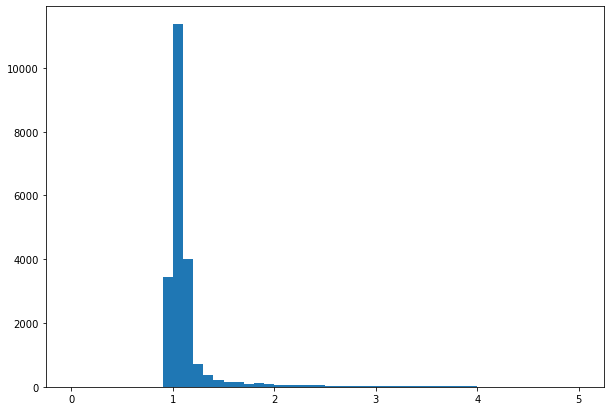

In [126]:
a = df_funnel['feature_8'].values * ( df_funnel['feature_9'] / 100 + 1) 
ratio = df_funnel['feature_7'] / a.values
plt.figure(figsize=(10,7))
plt.hist(ratio, bins=50, range=(0,5))
plt.show()

In [127]:
sum(ratio.values > 2)

792

In [128]:
np.corrcoef(df_funnel['feature_10'].fillna(0).values, df_funnel['feat7_min_feat8'].fillna(0).values)

array([[1.        , 0.55783966],
       [0.55783966, 1.        ]])

# payments.csv

In [116]:
df_payments.head()

,client_id,day_dt,sum_rur,pmnts_name,pmnts_name_bool
32,-2918739578801888500,2019-02-10,155120.0,Salary receipts,0
33,-2918739578801888500,2019-04-24,38077.0,Salary receipts,0
34,-2918739578801888500,2019-05-25,58469.0,Salary receipts,0
35,-2918739578801888500,2019-04-10,166009.0,Salary receipts,0
36,-2918739578801888500,2019-05-08,27455.0,Salary receipts,0


In [117]:
df_payments['pmnts_name'].value_counts()

Salary receipts     112294
Pension receipts      3807
Name: pmnts_name, dtype: int64

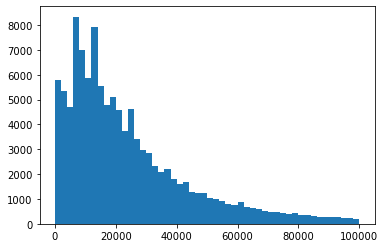

In [118]:
plt.hist(df_payments['sum_rur'], bins=50, range=(0, 1e5))
plt.show()

In [119]:
df_payments["pmnts_name_bool"] = (df_payments["pmnts_name"] == 'Pension receipts').astype('int64')
df_payments_grouped = df_payments.groupby(by="client_id", as_index=False, sort=False)["pmnts_name_bool"]
df_payments_grouped_max = df_payments_grouped.mean()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_payments_grouped_max["pmnts_name_bool"].values

In [121]:
len(np.unique(df_payments.client_id))

5425

In [122]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_payments_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_payments_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [123]:
y_selected = df_funnel_selected_shuffled['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00739006],
       [-0.00739006,  1.        ]])

In [124]:
# df_outer = pd.merge(df_funnel, df_payments_grouped_max, on='client_id', how='left')

In [125]:
len(y_selected)

5425

In [126]:
sum(y_selected)

2464

In [109]:
df_payments_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["balance_rur_amt"]
df_payments_grouped_max = df_payments_grouped.max()
df_payments_grouped_max = df_payments_grouped_max.fillna(0)
feat = df_payments_grouped_max["balance_rur_amt"].values

In [110]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_payments_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_payments_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [111]:
df_payments_grouped_max.tail(10)

,client_id,balance_rur_amt
6977,2573668815005981530,29747.0
6978,-7500774652734072252,391.0
6979,-6601783320506447993,1168336.0
6980,895971972967899485,36919.0
6981,-5735935511373044848,37021.0
6982,6990548184631195402,4628.0
6983,-779309569391551027,37764.0
6984,2014661224537242110,3730.0
6985,7797789328120269779,33218.0
6986,161383671559828442,121412.0


In [112]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00456379],
       [-0.00456379,  1.        ]])

In [113]:
np.corrcoef(df_funnel.fillna(0).region_cd, df_client.fillna(0).region)

array([[ 1.       , -0.3928143],
       [-0.3928143,  1.       ]])

In [114]:
df_funnel

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd,feat7_min_feat8
4,-8156468515495593794,1,138018.05,1,7,14.0,3642369.0,97156.0,81488.0,0.0,160308.0,3642369.0,3314257.0,10.4,78108.0,27.0,328112.0
5,-2918739578801888500,1,121907.95,1,7,1.0,4212398.0,151894.0,73012.0,161463.0,265647.0,3520957.0,567525.0,7.4,70386.0,77.0,2953432.0
6,-4569470415387261653,0,NaN,2,1,8.0,1000940.0,15992.0,11534.0,0.0,83000.0,736973.0,624553.0,10.9,15987.0,56.0,112420.0
7,497866795935220651,0,NaN,1,13,3.0,6070615.0,1927.0,30014.0,33300.0,19302.0,94702.0,72847.0,7.9,1936.0,52.0,21855.0
10,-1093433514453846397,0,NaN,1,9,9.0,1821184.0,5425.0,3715.0,0.0,16073.0,205187.0,157836.0,19.9,5425.0,42.0,47351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,-8727103852075923180,1,21016.60,1,8,1.0,1461684.0,45055.0,47875.0,133524.0,102569.0,1461804.0,1281161.0,13.9,33938.0,86.0,180643.0
21484,8867503270592066463,1,50289.70,2,8,14.0,2428246.0,74158.0,47571.0,0.0,244516.0,2428246.0,1481577.0,17.4,60872.0,71.0,946669.0
21491,6124360150058591747,0,NaN,1,9,14.0,1821184.0,9215.0,18543.0,0.0,46374.0,348453.0,287978.0,19.9,9212.0,66.0,60475.0
21492,6304729431024445752,1,52367.45,1,8,3.0,2428246.0,27460.0,44014.0,26817.0,84454.0,1195911.0,480452.0,13.4,27456.0,66.0,715459.0


In [115]:
good_client = []
for val in np.unique(df_funnel.dropna().client_segment.values):
    df_funnel_selected_reg = df_funnel.query("client_segment == " + str(val))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_funnel_selected_reg.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)

    if r > 0.3 and len(df_funnel_selected) > 10:
        print('client_segment: ', val)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')
        
        good_client.append(val)

client_segment:  1.0
0.53
num:  2049
 
client_segment:  2.0
0.52
num:  297
 
client_segment:  3.0
0.42
num:  1922
 
client_segment:  4.0
0.41
num:  1087
 
client_segment:  6.0
0.44
num:  39
 
client_segment:  7.0
0.4
num:  168
 
client_segment:  8.0
0.42
num:  332
 
client_segment:  15.0
0.36
num:  162
 
client_segment:  16.0
0.38
num:  560
 


# trxn.csv

In [154]:
df_trxn.head()

,client_id,card_id,tran_time,tran_amt_rur,mcc_cd,merchant_cd,txn_country,txn_city,tsp_name,txn_comment_1,txn_comment_2
10,-4569470415387261653,-6412558398403838420,2019-07-03 13:08:09,78918.0,6011.0,1652474843146974156,RUS,ORSK,OFIS PAO BINBANK,Cash withdrawal through an ATM,NaN
11,497866795935220651,-906692339483884238,2019-07-10 00:56:31,4249.0,6011.0,3967370607447365704,RUS,KSTOVO,GAZPROMBANK,Cash withdrawal through an ATM,NaN
12,497866795935220651,-906692339483884238,2019-07-07 21:36:22,6071.0,6011.0,3967370607447365704,RUS,KSTOVO,GAZPROMBANK,Cash withdrawal through an ATM,NaN
23,-330127410754871235,-5413591990581905103,2019-07-27 13:44:51,89845.0,6011.0,6671992430928680116,RUS,PENZA,OO NA MOSKOVSKOI,Cash withdrawal through an ATM,NaN
24,-330127410754871235,-5413591990581905103,2019-08-21 00:00:00,6071.0,6011.0,3967370607447365704,RUS,PENZA,SUVOROVA STR,Cash withdrawal through an ATM,NaN


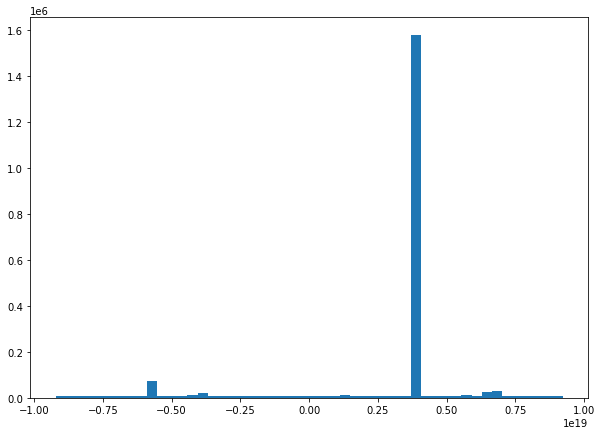

In [167]:
plt.figure(figsize=(10,7))
plt.hist(df_trxn['merchant_cd'], bins = 50)
plt.show()

In [247]:
df_trxn['tsp_name'].value_counts(dropna=False)

OPEN.RU CARDCARD          101845
WWW.OPENONLINE.RU         100230
PYATEROCHKA                97681
KRASNOE BELOE              57208
ATM                        40321
                           ...  
UL. INTERNATSIONALNAYA         1
IP SIPIN S.S.                  1
MAGNIT MM OSTREIDA             1
IP LYSIKOVA SG                 1
TSN SNT STROITEL               1
Name: tsp_name, Length: 112120, dtype: int64

In [248]:
df_trxn['txn_comment_1'].value_counts(dropna=False)

Payment for goods and services     1750622
Cash withdrawal through an ATM      156660
Cashless transfer                   106721
Payment by card (bank transfer)      37720
Cash deposit by card                 29293
Return of goods / services            5936
Cash withdrawal                        848
Name: txn_comment_1, dtype: int64

In [249]:
df_trxn['txn_comment_2'].value_counts(dropna=False)

NaN                       1803022
<manual mode>              115555
Opening Online             100230
Purchase payment (web)      65244
VISA MONEY TRANSFER          3743
MASTERCARD MONEYSEND            6
Name: txn_comment_2, dtype: int64

In [296]:
df_trxn_grouped = df_trxn.groupby(by="client_id", as_index=False, sort=False)["mcc_cd"]
df_trxn_grouped_mean = df_trxn_grouped.std()
df_trxn_grouped_mean = df_trxn_grouped_mean.fillna(0)
feat = df_trxn_grouped_mean["mcc_cd"].values

In [297]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_trxn_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_trxn_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

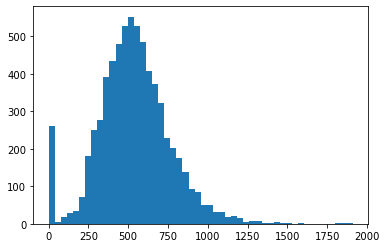

In [308]:
plt.hist(df_trxn_grouped_mean.mcc_cd, bins=50)
plt.show()

In [299]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.01110847],
       [-0.01110847,  1.        ]])

In [300]:
df_trxn_grouped_mean.head(20)

,client_id,mcc_cd
0,-4569470415387261653,639.903962
1,497866795935220651,392.387473
2,-330127410754871235,471.098552
3,-8220943058821961411,612.532758
4,377141127543547866,734.691310
5,-5924052245502407994,390.700722
6,-6415375684334379970,0.000000
7,1056524954426057293,686.742414
8,1385805512840068341,528.356792
9,625848590982096381,407.571539


In [339]:
df_t_selected = df_trxn_grouped_mean.loc[df_trxn_grouped_mean["mcc_cd"] < 200]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_t_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [340]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.3131868131868132

In [341]:
len(df_funnel_selected_shuffled.sale_flg.values)

364

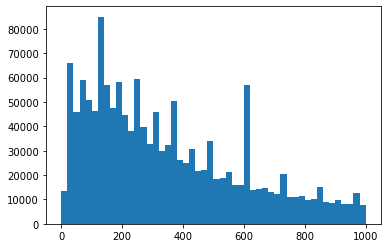

In [401]:
plt.hist(df_trxn.tran_amt_rur, bins=50, range=(0,1000))
plt.show()

In [424]:
df_trxn_grouped = df_trxn.groupby(by="client_id", as_index=False, sort=False)["tran_amt_rur"]
df_trxn_grouped_mean = df_trxn_grouped.max()
df_trxn_grouped_mean = df_trxn_grouped_mean.fillna(0)
feat = df_trxn_grouped_mean["tran_amt_rur"].values

In [425]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_trxn_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_trxn_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

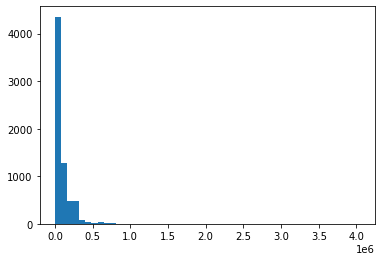

In [426]:
plt.hist(df_trxn_grouped_mean.tran_amt_rur, bins=50)
plt.show()

In [427]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[ 1.        , -0.00809802],
       [-0.00809802,  1.        ]])

In [428]:
df_trxn_grouped_mean.head(20)

,client_id,tran_amt_rur
0,-4569470415387261653,78918.0
1,497866795935220651,37516.0
2,-330127410754871235,182118.0
3,-8220943058821961411,27919.0
4,377141127543547866,15369.0
5,-5924052245502407994,121412.0
6,-6415375684334379970,49779.0
7,1056524954426057293,48565.0
8,1385805512840068341,352096.0
9,625848590982096381,19001.0


In [434]:
df_t_selected = df_trxn_grouped_mean.loc[df_trxn_grouped_mean["tran_amt_rur"] < 10000]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_t_selected['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [435]:
sum(df_funnel_selected_shuffled.sale_flg.values) / len(df_funnel_selected_shuffled.sale_flg.values)

0.3143989431968296

In [436]:
len(df_funnel_selected_shuffled.sale_flg.values)

757

In [ ]:
combined_client_idx = list(set(list(set(df_aum.client_id.values)) + list(set(df_appl.client_id.values))))
combined_client_idx = list(set(combined_client_idx + list(set(df_balance.client_id.values)) + list(set(df_com.client_id.values))))
combined_client_idx = list(set(combined_client_idx + list(set(df_payments.client_id.values)) + list(set(df_deals.client_id.values)) + list(set(df_trxn.client_id.values))))

pres_feat = np.array([df_funnel.client_id.values[i] in combined_client_idx for i in range(len(df_funnel))], dtype=int)

### model train predict

In [153]:
train_predict = pd.read_csv('../train_predict.csv')
y_true = pd.read_csv('../true_train.csv')
y_true = y_true.values.ravel()

In [138]:
train_predict

,0
0,1
1,1
2,1
3,1
4,1
...,...
9037,1
9038,1
9039,1
9040,1


In [139]:
sum(train_predict.values) / len(train_predict)

array([0.99834107])

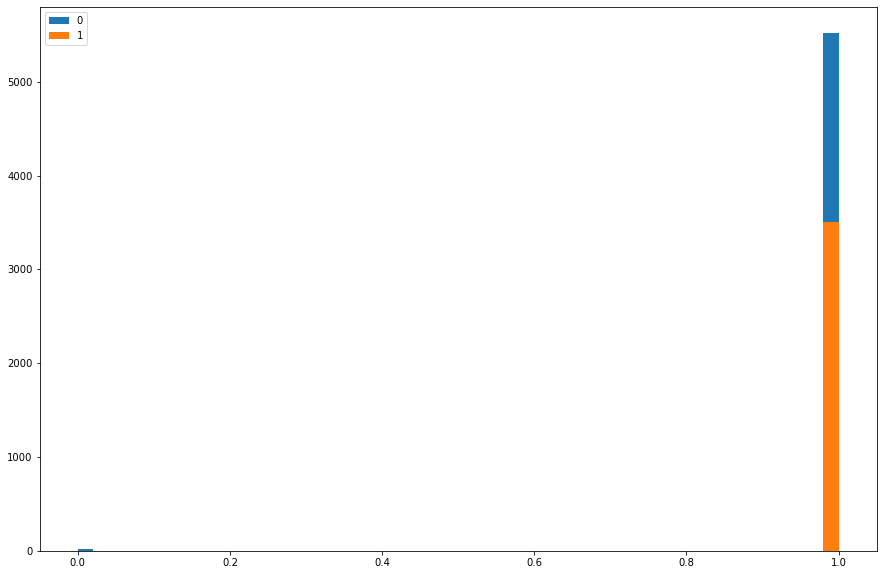

In [140]:
plt.figure(figsize=(15, 10))
# plt.hist(train_predict, bins=50)
# plt.hist(train_predict[y_true == 0], bins=50, range=(1-1e-6, 1), label = '0')
# plt.hist(train_predict[y_true == 1], bins=50, range=(1-1e-6, 1), label = '1')
plt.hist(train_predict[y_true == 0], bins=50, label = '0')
plt.hist(train_predict[y_true == 1], bins=50, label = '1')
plt.legend()
plt.show()

In [106]:
sum(train_predict[y_true == 1].values < 1 - 1e-1)

array([3])

In [66]:
len(train_predict)

9042